In [39]:
# complete all imports at start of notebook
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt

import pandas as pd
import requests

In [40]:
#Converts column to lowercase and replaces spaces with underscores
def rename_columns(col):
    lower_col = col.lower()
    replace_spaces_col = lower_col.replace(" ","_")
    return replace_spaces_col

In [41]:
def convert_range_cols_integers(col, range_char):
    first_values = col.str.split(range_char).str[0].values
    numeric_first_values = pd.to_numeric(first_values)
    return numeric_first_values

In [42]:
#WW2 Data
# read csv file and assign to variable
ww2 = pd.read_csv('ww2_dataset2.csv')

In [43]:
# view first five rows of WW2 dataset
ww2.head()

,Country,Total pop 19391939,Militarydeaths,Civilian deaths,Totaldeaths,% of Population,Militarywounded
0,Australia,"6,968,000","39,700",700,40400,0.58,"39,803"
1,Belgium,"8,387,000","12,000","76,000",88000,1.05,"55,513"
2,Bulgaria,"6,458,000","18,500","3,000",21500,0.33,"21,878"
3,Canada,"11,267,000","42,000","1,600",43600,0.38,"53,174"
4,France,"41,680,000","210,000","390,000",600000,1.44,"390,000"


In [44]:
print(ww2)

           Country Total pop 19391939 Militarydeaths Civilian deaths  \
0        Australia          6,968,000         39,700             700   
1          Belgium          8,387,000         12,000          76,000   
2         Bulgaria          6,458,000         18,500           3,000   
3           Canada         11,267,000         42,000           1,600   
4           France         41,680,000        210,000         390,000   
5          Germany         69,300,000      5,318,000       3,000,000   
6           Greece          7,222,000         35,100         171,800   
7          Hungary          9,129,000        200,000         664,000   
8            India        377,800,000         87,000             NaN   
9            Italy         44,394,000        341,000         153,200   
10           Japan         71,380,000      2,300,000         800,000   
11    Newfoundland            320,000          1,100             100   
12     New Zealand          1,629,000         11,700            

In [45]:
# view unique countries
ww2['Country'].unique()

array(['Australia', 'Belgium', 'Bulgaria', 'Canada', 'France', 'Germany',
       'Greece', 'Hungary', 'India', 'Italy', 'Japan', 'Newfoundland',
       'New Zealand', 'Romania', 'South Africa', 'Soviet Union', 'Sweden',
       'Switzerland', 'Thailand', 'Turkey', 'United Kingdom',
       'United States'], dtype=object)

In [46]:
# Getting rid of x countries 
ww2_cleaned = ww2.drop(labels=[0,8,14,6,7,13,1,3,2,11,12,18,16,19,17], axis=0)

In [47]:
# sorting on Population column (ascending)
ww2_cleaned = ww2_cleaned.sort_values(by='% of Population',ascending=False)

In [48]:
# reset index after removing rows
ww2_cleaned = ww2_cleaned.reset_index(drop=True)

In [49]:
# view dataset with countries removed
ww2_cleaned

,Country,Total pop 19391939,Militarydeaths,Civilian deaths,Totaldeaths,% of Population,Militarywounded
0,Japan,"71,380,000","2,300,000","800,000","3,100,000",3.920,"326,000"
1,France,"41,680,000","210,000","390,000",600000,1.440,"390,000"
2,Soviet Union,"188,793,000","11,400,000","10,000,000","27,000,000",1.150,NaN
3,Italy,"44,394,000","341,000","153,200","492,400",1.135,"320,000"
4,Germany,"69,300,000","5,318,000","3,000,000","7,400,000",1.000,"7,300,000"
5,United Kingdom,"47,760,000","383,700","67,200",450900,0.940,"376,239"
6,United States,"131,028,000","407,300","12,100",419400,0.320,"671,801"


In [50]:
# Dropping unwanted column 
ww2_cleaned = ww2_cleaned.drop(['Militarywounded'], axis=1)

In [51]:
# rename total pop column
ww2_cleaned = ww2_cleaned.rename(columns = {"Total pop 19391939":"Totalpop"})

In [52]:
# check types
print(ww2_cleaned.dtypes)

Country             object
Totalpop            object
Militarydeaths      object
Civilian deaths     object
Totaldeaths         object
% of Population    float64
dtype: object


In [53]:
# getting rid of commas in strings of numbers 
# renaming dataset for clarity
ww2_cleaned = ww2_cleaned.replace(',','', regex=True)

In [54]:
# Converting cols to correct data types integers 
ww2_cleaned = ww2_cleaned.astype(
    {'Militarydeaths':'int', 'Totalpop':'int', 'Civilian deaths':'int', 'Totaldeaths':'int'}
)

In [55]:
# Getting rid of duplicate cols (no duplicates, but showing method)
ww2_cleaned = ww2_cleaned.drop_duplicates(subset=['Country'], keep=False)

In [56]:
ww2_cleaned

,Country,Totalpop,Militarydeaths,Civilian deaths,Totaldeaths,% of Population
0,Japan,71380000,2300000,800000,3100000,3.920
1,France,41680000,210000,390000,600000,1.440
2,Soviet Union,188793000,11400000,10000000,27000000,1.150
3,Italy,44394000,341000,153200,492400,1.135
4,Germany,69300000,5318000,3000000,7400000,1.000
5,United Kingdom,47760000,383700,67200,450900,0.940
6,United States,131028000,407300,12100,419400,0.320


In [58]:
ww2_cleaned = ww2_cleaned.rename(mapper = rename_columns, axis = 1)

In [59]:
ww2_cleaned

,country,totalpop,militarydeaths,civilian_deaths,totaldeaths,%_of_population
0,Japan,71380000,2300000,800000,3100000,3.920
1,France,41680000,210000,390000,600000,1.440
2,Soviet Union,188793000,11400000,10000000,27000000,1.150
3,Italy,44394000,341000,153200,492400,1.135
4,Germany,69300000,5318000,3000000,7400000,1.000
5,United Kingdom,47760000,383700,67200,450900,0.940
6,United States,131028000,407300,12100,419400,0.320


In [60]:
# scrape WW1 data from Wikipedia
url = "https://en.wikipedia.org/wiki/World_War_I_casualties"
page = requests.get(url)

In [61]:
# load table in wikipedia page
soup = BeautifulSoup(page.content, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})

In [62]:
# load data into a table
df=pd.read_html(str(indiatable))

In [63]:
# for loop to check number of tables and output relevant index
for index, data in enumerate(df):
    print(index)

0


In [64]:
# indexing to required table
world_war_one = df[0]

In [65]:
type(world_war_one.columns)

pandas.core.indexes.multi.MultiIndex

In [66]:
#Get rid of unnecessary Axis
world_war_one.columns = world_war_one.columns.droplevel(level=1)

In [67]:
#Checking Work
world_war_one.columns

Index(['Nation', 'Population (millions)',
       'Combat deaths and missing in action (included in total military deaths)',
       'Total military deaths (from all causes)',
       'Civilian deaths (military action and crimes against humanity)',
       'Increase in civilian deaths (malnutrition and disease excluding Influenza pandemic)',
       'Total deaths', 'Deaths as % of population', 'Military wounded'],
      dtype='object')

In [68]:
# Getting rid of x countries 
world_war_one_cleaned = world_war_one.drop(
    labels=[0,1,2,3,4,5,7,8,10,13,14,15,17,19,20,21,22,24,25,26,27,28,29,30,31,32], axis=0
)

In [69]:
# reset index after removing rows
world_war_one_cleaned = world_war_one_cleaned.reset_index(drop=True)

In [70]:
world_war_one_cleaned

,Nation,Population (millions),Combat deaths and missing in action (included in total military deaths),Total military deaths (from all causes),Civilian deaths (military action and crimes against humanity),Increase in civilian deaths (malnutrition and disease excluding Influenza pandemic),Total deaths,Deaths as % of population,Military wounded
0,United Kingdom(and Colonies) s,45.4,"744,000s1","887,858[11]","16,829[21][27]","107,000[28]","867,829 to 1,011,687",1.9% to 2.2%,"1,675,000s1"
1,France e,39.6,"1,150,000[34][35]","1,357,000[20]to 1,397,800[36]","40,000[18][37][38]","300,000[32]","1,697,000to 1,737,800",4.3% to 4.4%,"4,266,000[33]"
2,Italy h,35.6,"460,000[29]","460,000[29] to 651,000[41]","3,400[42]","589,000[43]","1,052,400 to 1,243,400",3% to 3.5%,"947,000[33]"
3,Japan i,53.6,300[33],"300[33] to 4,661[44]",NaN,NaN,"300 to 4,661",0% to 0%,907[33]
4,Russia p,175.1,"775,369 to 1,700,000[33][20]","1,700,000[33] to2,254,369[48]","410,000[49]","730,000[49]","2,840,000 to3,394,369",1.6% to 1.9%,"3,749,000[48] to4,950,000[33]"
5,United States t,92.0,"53,402[52]","116,708[53][54]",757[55],NaN,117466,0.1%,"204,002[53]"
6,Germany w,64.9,"1,800,000[33][62][63]","2,037,000[64][65]",720[66],"424,000[67] to 763,000[68][69]","2,198,420 to 2,800,720",3.4% to 4.3%,"4,215,662[64]"


In [71]:
print(world_war_one_cleaned.dtypes)

Nation                                                                                 object
Population (millions)                                                                  object
Combat deaths and missing in action (included in total military deaths)                object
Total military deaths (from all causes)                                                object
Civilian deaths (military action and crimes against humanity)                          object
Increase in civilian deaths (malnutrition and disease excluding Influenza pandemic)    object
Total deaths                                                                           object
Deaths as % of population                                                              object
Military wounded                                                                       object
dtype: object


In [72]:
# looking at column of importance 
world_war_one_cleaned.columns[-2]

'Deaths as\xa0% of population'

In [73]:
# view first few values
world_war_one_cleaned.iloc[:, -2].head()

0    1.9% to 2.2%
1    4.3% to 4.4%
2      3% to 3.5%
3        0% to 0%
4    1.6% to 1.9%
Name: Deaths as % of population, dtype: object

In [74]:
# view all values
world_war_one_cleaned.iloc[:,-2].values

array(['1.9% to 2.2%', '4.3% to 4.4%', '3% to 3.5%', '0% to 0%',
       '1.6% to 1.9%', '0.1%', '3.4% to 4.3%'], dtype=object)

In [75]:
filtered_deaths_percent = convert_range_cols_integers(world_war_one_cleaned.iloc[:,-2], range_char="%")

In [76]:
filtered_deaths_percent

array([1.9, 4.3, 3. , 0. , 1.6, 0.1, 3.4])

In [77]:
#New data set
world_war_updated = world_war_one_cleaned

In [78]:
world_war_updated.iloc[:,-2] = filtered_deaths_percent

In [79]:
world_war_updated

,Nation,Population (millions),Combat deaths and missing in action (included in total military deaths),Total military deaths (from all causes),Civilian deaths (military action and crimes against humanity),Increase in civilian deaths (malnutrition and disease excluding Influenza pandemic),Total deaths,Deaths as % of population,Military wounded
0,United Kingdom(and Colonies) s,45.4,"744,000s1","887,858[11]","16,829[21][27]","107,000[28]","867,829 to 1,011,687",1.9,"1,675,000s1"
1,France e,39.6,"1,150,000[34][35]","1,357,000[20]to 1,397,800[36]","40,000[18][37][38]","300,000[32]","1,697,000to 1,737,800",4.3,"4,266,000[33]"
2,Italy h,35.6,"460,000[29]","460,000[29] to 651,000[41]","3,400[42]","589,000[43]","1,052,400 to 1,243,400",3.0,"947,000[33]"
3,Japan i,53.6,300[33],"300[33] to 4,661[44]",NaN,NaN,"300 to 4,661",0.0,907[33]
4,Russia p,175.1,"775,369 to 1,700,000[33][20]","1,700,000[33] to2,254,369[48]","410,000[49]","730,000[49]","2,840,000 to3,394,369",1.6,"3,749,000[48] to4,950,000[33]"
5,United States t,92.0,"53,402[52]","116,708[53][54]",757[55],NaN,117466,0.1,"204,002[53]"
6,Germany w,64.9,"1,800,000[33][62][63]","2,037,000[64][65]",720[66],"424,000[67] to 763,000[68][69]","2,198,420 to 2,800,720",3.4,"4,215,662[64]"


In [80]:
world_war_updated.loc[:,"Total deaths"]

0      867,829 to 1,011,687
1     1,697,000to 1,737,800
2    1,052,400 to 1,243,400
3              300 to 4,661
4     2,840,000 to3,394,369
5                    117466
6    2,198,420 to 2,800,720
Name: Total deaths, dtype: object

In [81]:
world_war_updated = world_war_updated.replace(',','', regex=True)

In [82]:
filtered_total_deaths = convert_range_cols_integers(world_war_updated.loc[:,"Total deaths"], range_char="to")

In [83]:
filtered_total_deaths

array([ 867829, 1697000, 1052400,     300, 2840000,  117466, 2198420],
      dtype=int64)

In [59]:
world_war_updated

,Nation,Population (millions),Combat deaths and missing in action (included in total military deaths),Total military deaths (from all causes),Civilian deaths (military action and crimes against humanity),Increase in civilian deaths (malnutrition and disease excluding Influenza pandemic),Total deaths,Deaths as % of population,Military wounded
6,United Kingdom(and Colonies) s,45.4,"744,000s1","887,858[11]","16,829[21][27]","107,000[28]","867,829 to 1,011,687",1.9,"1,675,000s1"
9,France e,39.6,"1,150,000[34][35]","1,357,000[20]to 1,397,800[36]","40,000[18][37][38]","300,000[32]","1,697,000to 1,737,800",4.3,"4,266,000[33]"
11,Italy h,35.6,"460,000[29]","460,000[29] to 651,000[41]","3,400[42]","589,000[43]","1,052,400 to 1,243,400",3.0,"947,000[33]"
12,Japan i,53.6,300[33],"300[33] to 4,661[44]",NaN,NaN,"300 to 4,661",0.0,907[33]
16,Russia p,175.1,"775,369 to 1,700,000[33][20]","1,700,000[33] to2,254,369[48]","410,000[49]","730,000[49]","2,840,000 to3,394,369",1.6,"3,749,000[48] to4,950,000[33]"
18,United States t,92.0,"53,402[52]","116,708[53][54]",757[55],NaN,117466,0.1,"204,002[53]"
23,Germany w,64.9,"1,800,000[33][62][63]","2,037,000[64][65]",720[66],"424,000[67] to 763,000[68][69]","2,198,420 to 2,800,720",3.4,"4,215,662[64]"


In [60]:
#Splitting Countries to align with other set
world_war_updated["Nation"].str.split().str[:-1]

6     [United, Kingdom(and, Colonies)]
9                             [France]
11                             [Italy]
12                             [Japan]
16                            [Russia]
18                    [United, States]
23                           [Germany]
Name: Nation, dtype: object

In [61]:
nations_updated = world_war_updated["Nation"].str.split().str[:-1].str.join(" ").str.split("(").str[0]

In [62]:
nations_updated

6     United Kingdom
9             France
11             Italy
12             Japan
16            Russia
18     United States
23           Germany
Name: Nation, dtype: object

In [63]:
world_war_updated["Nation"] = nations_updated

In [64]:
world_war_updated

,Nation,Population (millions),Combat deaths and missing in action (included in total military deaths),Total military deaths (from all causes),Civilian deaths (military action and crimes against humanity),Increase in civilian deaths (malnutrition and disease excluding Influenza pandemic),Total deaths,Deaths as % of population,Military wounded
6,United Kingdom,45.4,"744,000s1","887,858[11]","16,829[21][27]","107,000[28]","867,829 to 1,011,687",1.9,"1,675,000s1"
9,France,39.6,"1,150,000[34][35]","1,357,000[20]to 1,397,800[36]","40,000[18][37][38]","300,000[32]","1,697,000to 1,737,800",4.3,"4,266,000[33]"
11,Italy,35.6,"460,000[29]","460,000[29] to 651,000[41]","3,400[42]","589,000[43]","1,052,400 to 1,243,400",3.0,"947,000[33]"
12,Japan,53.6,300[33],"300[33] to 4,661[44]",NaN,NaN,"300 to 4,661",0.0,907[33]
16,Russia,175.1,"775,369 to 1,700,000[33][20]","1,700,000[33] to2,254,369[48]","410,000[49]","730,000[49]","2,840,000 to3,394,369",1.6,"3,749,000[48] to4,950,000[33]"
18,United States,92.0,"53,402[52]","116,708[53][54]",757[55],NaN,117466,0.1,"204,002[53]"
23,Germany,64.9,"1,800,000[33][62][63]","2,037,000[64][65]",720[66],"424,000[67] to 763,000[68][69]","2,198,420 to 2,800,720",3.4,"4,215,662[64]"


In [66]:
#Pre merge check
WW2

,Country,Total pop 19391939,Militarydeaths,Civilian deaths,Totaldeaths,% of Population
10,Japan,71380000,2300000,800000,3100000,3.920
4,France,41680000,210000,390000,600000,1.440
15,Soviet Union,188793000,11400000,10000000,27000000,1.150
9,Italy,44394000,341000,153200,492400,1.135
5,Germany,69300000,5318000,3000000,7400000,1.000
20,United Kingdom,47760000,383700,67200,450900,0.940
21,United States,131028000,407300,12100,419400,0.320


In [67]:
Tab = WW2.replace('Soviet Union', 'Russia')

In [68]:
WW2 = Tab

In [69]:
#Merging of datasets - Innerjoin
Twoworldwars = pd.merge(world_war_updated, WW2, left_on = 'Nation', right_on = 'Country')

In [70]:
Twoworldwars

,Nation,Population (millions),Combat deaths and missing in action (included in total military deaths),Total military deaths (from all causes),Civilian deaths (military action and crimes against humanity),Increase in civilian deaths (malnutrition and disease excluding Influenza pandemic),Total deaths,Deaths as % of population,Military wounded,Country,Total pop 19391939,Militarydeaths,Civilian deaths,Totaldeaths,% of Population
0,United Kingdom,45.4,"744,000s1","887,858[11]","16,829[21][27]","107,000[28]","867,829 to 1,011,687",1.9,"1,675,000s1",United Kingdom,47760000,383700,67200,450900,0.940
1,France,39.6,"1,150,000[34][35]","1,357,000[20]to 1,397,800[36]","40,000[18][37][38]","300,000[32]","1,697,000to 1,737,800",4.3,"4,266,000[33]",France,41680000,210000,390000,600000,1.440
2,Italy,35.6,"460,000[29]","460,000[29] to 651,000[41]","3,400[42]","589,000[43]","1,052,400 to 1,243,400",3.0,"947,000[33]",Italy,44394000,341000,153200,492400,1.135
3,Japan,53.6,300[33],"300[33] to 4,661[44]",NaN,NaN,"300 to 4,661",0.0,907[33],Japan,71380000,2300000,800000,3100000,3.920
4,Russia,175.1,"775,369 to 1,700,000[33][20]","1,700,000[33] to2,254,369[48]","410,000[49]","730,000[49]","2,840,000 to3,394,369",1.6,"3,749,000[48] to4,950,000[33]",Russia,188793000,11400000,10000000,27000000,1.150
5,United States,92.0,"53,402[52]","116,708[53][54]",757[55],NaN,117466,0.1,"204,002[53]",United States,131028000,407300,12100,419400,0.320
6,Germany,64.9,"1,800,000[33][62][63]","2,037,000[64][65]",720[66],"424,000[67] to 763,000[68][69]","2,198,420 to 2,800,720",3.4,"4,215,662[64]",Germany,69300000,5318000,3000000,7400000,1.000


In [73]:
#Focusing of right columns
Table1 = Twoworldwars.iloc[:, [0,6,7,9,13,14]]

In [74]:
Table1

,Nation,Total deaths,Deaths as % of population,Country,Totaldeaths,% of Population
0,United Kingdom,"867,829 to 1,011,687",1.9,United Kingdom,450900,0.940
1,France,"1,697,000to 1,737,800",4.3,France,600000,1.440
2,Italy,"1,052,400 to 1,243,400",3.0,Italy,492400,1.135
3,Japan,"300 to 4,661",0.0,Japan,3100000,3.920
4,Russia,"2,840,000 to3,394,369",1.6,Russia,27000000,1.150
5,United States,117466,0.1,United States,419400,0.320
6,Germany,"2,198,420 to 2,800,720",3.4,Germany,7400000,1.000


In [75]:
#Simplifying Columns
Table1.rename(columns={'Total deaths':'Total_WW1'}, inplace = True)

C:\Users\cgleeson\AppData\Local\Temp\ipykernel_23296\4001061581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Table1.rename(columns={'Total deaths':'Total_WW1'}, inplace = True)


In [76]:
#Simplifying Columns
Table1.rename(columns={'Deaths as % of population':'%1', '% of Population':'%2'}, inplace = True)

C:\Users\cgleeson\AppData\Local\Temp\ipykernel_23296\2604341306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Table1.rename(columns={'Deaths as % of population':'%1', '% of Population':'%2'}, inplace = True)


In [79]:
#Simplifying Columns
Table1.rename(columns={'Deaths as\xa0% of population':'%_WW1'}, inplace = True)

C:\Users\cgleeson\AppData\Local\Temp\ipykernel_23296\3817842306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Table1.rename(columns={'Deaths as\xa0% of population':'%_WW1'}, inplace = True)


In [81]:
Table1.rename(columns={'Totaldeaths':'Total_WW2'}, inplace = True)

C:\Users\cgleeson\AppData\Local\Temp\ipykernel_23296\3877738707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Table1.rename(columns={'Totaldeaths':'Total_WW2'}, inplace = True)


In [83]:
Final_Table = Table1

In [85]:
#Assigning to New Table
Final_Table

,Nation,Total_WW1,%_WW1,Country,Total_WW2,%2
0,United Kingdom,"867,829 to 1,011,687",1.9,United Kingdom,450900,0.940
1,France,"1,697,000to 1,737,800",4.3,France,600000,1.440
2,Italy,"1,052,400 to 1,243,400",3.0,Italy,492400,1.135
3,Japan,"300 to 4,661",0.0,Japan,3100000,3.920
4,Russia,"2,840,000 to3,394,369",1.6,Russia,27000000,1.150
5,United States,117466,0.1,United States,419400,0.320
6,Germany,"2,198,420 to 2,800,720",3.4,Germany,7400000,1.000


In [87]:
#Description of table
Final_Table.describe()

,%_WW1,%2
count,7.000000,7.000000
mean,2.042857,1.415000
std,1.633868,1.156226
min,0.000000,0.320000
25%,0.850000,0.970000
50%,1.900000,1.135000
75%,3.200000,1.295000
max,4.300000,3.920000


In [90]:
#creation of list
col_list = Final_Table.Country.values.tolist()

In [89]:
col_list

['United Kingdom',
 'France',
 'Italy',
 'Japan',
 'Russia',
 'United States',
 'Germany']

In [91]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Country'>

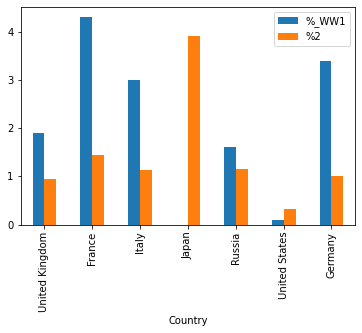

In [92]:
#Creation of Nested Bar Chart
Final_Table[['Country', '%_WW1', '%2']].plot(x='Country', kind='bar')

<AxesSubplot:xlabel='Country'>

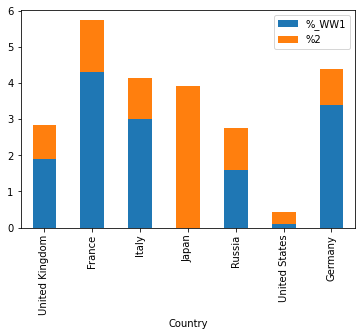

In [93]:
#Creation of stacked Bar Chart
Final_Table[['Country', '%_WW1', '%2']].plot(x='Country', kind='bar', stacked=True)

([<matplotlib.patches.Wedge at 0x1e8bbaa7850>,
 [Text(1.099291397503733, 0.03947687138426549, 'United Kingdom'),
  Text(1.0921477218265483, 0.13119967114699974, 'France'),
  Text(1.076625000425122, 0.2255628703036163, 'Italy'),
  Text(0.969263658374556, 0.5201230244416913, 'Japan'),
  Text(-1.0650246396250709, 0.2751772465003021, 'Russia'),
  Text(0.38667031604678254, -1.0297990418952045, 'United States'),
  Text(0.9145804030892408, -0.611181385748226, 'Germany')])

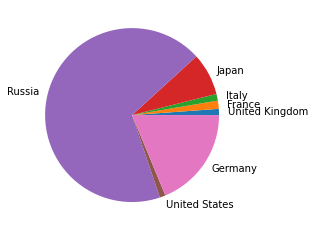

In [94]:
#Piechart of overall deaths WW2
plt.pie(Final_Table["Total_WW2"], labels = Final_Table["Country"])

In [95]:
#New column to allow Groupings
Axis_Allies = Final_Table.assign(Side=['Allies', 'Allies', 'Axis', 'Axis', 'Allies', 'Allies', 'Axis'])

In [96]:
Axis_Allies

,Nation,Total_WW1,%_WW1,Country,Total_WW2,%2,Side
0,United Kingdom,"867,829 to 1,011,687",1.9,United Kingdom,450900,0.940,Allies
1,France,"1,697,000to 1,737,800",4.3,France,600000,1.440,Allies
2,Italy,"1,052,400 to 1,243,400",3.0,Italy,492400,1.135,Axis
3,Japan,"300 to 4,661",0.0,Japan,3100000,3.920,Axis
4,Russia,"2,840,000 to3,394,369",1.6,Russia,27000000,1.150,Allies
5,United States,117466,0.1,United States,419400,0.320,Allies
6,Germany,"2,198,420 to 2,800,720",3.4,Germany,7400000,1.000,Axis


In [97]:
#Grouping into Axis and Allies
grouped_obj = Axis_Allies.groupby(["Side"])
for key, item in grouped_obj:
    print("Key is: " + str(key))
    print(str(item), "\n\n")

Key is: Allies
           Nation              Total_WW1  %_WW1         Country Total_WW2  \
0  United Kingdom   867,829 to 1,011,687    1.9  United Kingdom    450900   
1          France  1,697,000to 1,737,800    4.3          France    600000   
4          Russia  2,840,000 to3,394,369    1.6          Russia  27000000   
5   United States                 117466    0.1   United States    419400   

     %2    Side  
0  0.94  Allies  
1  1.44  Allies  
4  1.15  Allies  
5  0.32  Allies   


Key is: Axis
    Nation               Total_WW1  %_WW1  Country Total_WW2     %2  Side
2    Italy  1,052,400 to 1,243,400    3.0    Italy    492400  1.135  Axis
3    Japan            300 to 4,661    0.0    Japan   3100000  3.920  Axis
6  Germany  2,198,420 to 2,800,720    3.4  Germany   7400000  1.000  Axis 




In [100]:
#Overview of WW2 Deaths
Axis_Allies.groupby(["Side"])["Total_WW2"].mean()

Side
Allies    1.127252e+25
Axis      1.641334e+19
Name: Total_WW2, dtype: float64

In [101]:
#Overview of average percentages
Axis_Allies.groupby(["Side"])["%2"].mean()

Side
Allies    0.962500
Axis      2.018333
Name: %2, dtype: float64

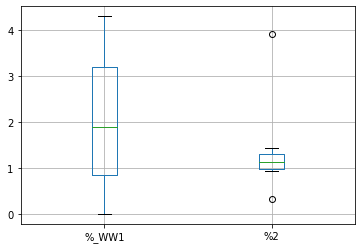

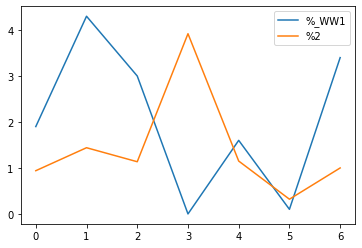

In [102]:
#Boxplot
Boxplot = Final_Table.boxplot(column = [


    '%_WW1',


    '%2',

])


Final_Table.plot()


plt.show()